In [2]:
# credit: https://www.kaggle.com/niharika41298/product-recommendations-plotly-dash-interactive-ui/notebook
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array, ImageDataGenerator
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
from keras import layers, optimizers, utils
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

ImportError: cannot import name 'vgg16' from 'keras.applications' (unknown location)

In [27]:
# get image relative path
imgs_path = "data/images"
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]
print("Total number of images:",len(files))

Total number of images: 44441


In [28]:
# In order to reduce compilation time of the algorithm, we reduce the data to 500 images
files=files[0:500]

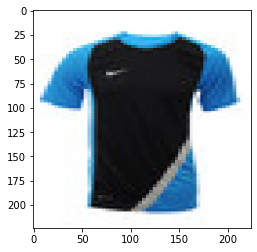

In [29]:
# visualize our data set
# our model only accept image input with size 224x224
original = load_img(files[5], target_size=(224, 224))
plt.imshow(original)
plt.show()

In [30]:
from keras import models
# load the model - Vgg16
# introduction of the model: https://medium.com/@mygreatlearning/what-is-vgg16-introduction-to-vgg16-f2d63849f615
vgg_model = vgg16.VGG16(weights='imagenet')

# # remove the last layers in order to get features instead of predictions
model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print model summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [31]:
# since vgg16 can only process one image at a time, we train the model with 'original' first
numpy_image = img_to_array(original)

# convert the image / images into batch format
image_batch = np.expand_dims(numpy_image, axis=0)
print('Image Batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

Image Batch size (1, 224, 224, 3)


In [32]:
# predict our training data
img_features = model.predict(processed_image)
img_features

array([[1.1682887, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [33]:
# now we run all 500 images we extracted through our model
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [34]:
imgs_features = model.predict(processed_imgs)

In [35]:
# now find the cosine similarities between each images
cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10000.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10001.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10002.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10003.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10004.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10005.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10006.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10007.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10008.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10009.jpg,...,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10581.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10582.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10583.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10584.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10585.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10587.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10588.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10593.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10594.jpg,/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10595.jpg
/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10000.jpg,1.000000,0.531092,0.493156,0.705635,0.511560,0.471129,0.488218,0.476553,0.385720,0.450506,...,0.383457,0.329909,0.294578,0.343464,0.294728,0.383237,0.293972,0.523438,0.521142,0.369286
/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10001.jpg,0.531092,1.000000,0.789222,0.529777,0.526021,0.390013,0.477478,0.346031,0.447088,0.412840,...,0.449966,0.361765,0.458027,0.379679,0.537955,0.498682,0.423911,0.465780,0.543085,0.530695
/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10002.jpg,0.493156,0.789222,1.000000,0.544243,0.579768,0.396956,0.506912,0.417302,0.507057,0.486135,...,0.541581,0.453594,0.442053,0.474938,0.592130,0.521177,0.445562,0.472132,0.566443,0.577036
/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10003.jpg,0.705635,0.529777,0.544243,1.000000,0.581718,0.562413,0.609192,0.572822,0.545917,0.584867,...,0.418731,0.377659,0.389102,0.390708,0.394412,0.453827,0.386906,0.497251,0.542856,0.443609
/Users/wangp/OneDrive/Documents/GitHub/PIC16BProject/images/10004.jpg,0.511560,0.526021,0.579768,0.581718,1.000000,0.466936,0.522210,0.302489,0.462060,0.422907,...,0.339101,0.300996,0.312053,0.293881,0.306056,0.351993,0.299703,0.529282,0.525470,0.391095


In [66]:
def recommended_outfit(img):
  """
  retrieve the most similar 5 products for the imputted image

  arguements:
  img: image that is going to be used to find its most similar products

  return: the five most similar images
  """
  print("Original product:")

  original = load_img(img, target_size=(224, 224))
  plt.imshow(original)
  plt.show()

  print("\n\nMost similar products:")

  closest_imgs = cos_similarities_df[img].sort_values(ascending=False)[1:6].index
  storage = []
  
  for i in range(len(closest_imgs)):
      original = load_img(closest_imgs[i], target_size=(224, 224))
      storage.append(original)
      #plt.imshow(original)
      #plt.show()

  return storage 
  

Original product:


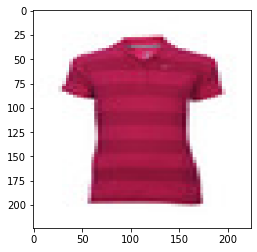



Most similar products:


[<PIL.Image.Image image mode=RGB size=224x224 at 0x1E6C88B2F10>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x1E682E90850>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x1E6C89D4430>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x1E682EDD790>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x1E6C861F370>]

In [61]:
# test
recommended_outfit('1163.jpg')